In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import warnings

In [3]:
warnings.simplefilter("ignore")

In [4]:
df = pd.read_csv("C:/a space/S8/Reto/iar_Reservaciones.csv")

In [5]:
df.drop(['h_correo_e', 'h_nom'], axis='columns', inplace=True)

In [6]:
df.shape

(203002, 47)

#### Reemplazamos los campos vacíos (con solo espacios) por valores nulos para mayor control

In [7]:
df = df.replace(r'^\s*$', np.nan, regex=True)

#### Contamos no nulos después de la corrección

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203002 entries, 0 to 203001
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID_Reserva                203002 non-null  int64  
 1   Fecha_hoy                 203002 non-null  object 
 2   h_res_fec                 203002 non-null  int64  
 3   h_res_fec_ok              203002 non-null  object 
 4   h_res_fec_okt             203002 non-null  object 
 5   h_num_per                 203002 non-null  int64  
 6   aa_h_num_per              203002 non-null  int64  
 7   h_num_adu                 203002 non-null  int64  
 8   aa_h_num_adu              203002 non-null  int64  
 9   h_num_men                 203002 non-null  int64  
 10  aa_h_num_men              203002 non-null  int64  
 11  h_num_noc                 203002 non-null  int64  
 12  aa_h_num_noc              203002 non-null  int64  
 13  h_tot_hab                 203002 non-null  i

#### Convertimos a tipo de dato fecha todas las columnas en las que corresponda, haciendo distinción dependiendo de su formato

In [9]:
columnas_fechas = ['Fecha_hoy', 'h_fec_reg_ok', 'h_fec_reg_okt', 'h_res_fec_ok', 'h_res_fec_okt', 'h_fec_lld_ok', 'h_fec_lld_okt', 'h_ult_cam_fec_ok', 'h_ult_cam_fec_okt', 'h_fec_sda_ok', 'h_fec_sda_okt']
columnas_fechas_sin_guion = ['h_fec_reg', 'h_fec_lld', 'h_res_fec','h_ult_cam_fec', 'h_fec_sda', ]

for fecha in columnas_fechas:
    df[fecha] = pd.to_datetime(df[fecha], errors='coerce')

for fecha in columnas_fechas_sin_guion:
    df[fecha] = pd.to_datetime(df[fecha], format='%Y%m%d', errors='coerce')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203002 entries, 0 to 203001
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ID_Reserva                203002 non-null  int64         
 1   Fecha_hoy                 203002 non-null  datetime64[ns]
 2   h_res_fec                 203002 non-null  datetime64[ns]
 3   h_res_fec_ok              203002 non-null  datetime64[ns]
 4   h_res_fec_okt             203002 non-null  datetime64[ns]
 5   h_num_per                 203002 non-null  int64         
 6   aa_h_num_per              203002 non-null  int64         
 7   h_num_adu                 203002 non-null  int64         
 8   aa_h_num_adu              203002 non-null  int64         
 9   h_num_men                 203002 non-null  int64         
 10  aa_h_num_men              203002 non-null  int64         
 11  h_num_noc                 203002 non-null  int64         
 12  aa

### Revisamos cantidad y porcentajes de valores nulos

In [11]:
df.isnull().sum().sort_values(ascending=False)

h_cod_reserva               128142
h_codigop                    57324
h_fec_reg                     1550
h_ult_cam_fec                  533
h_can_res                      492
h_fec_sda                       34
h_fec_lld                        2
h_edo                            2
Cliente_Disp                     0
h_fec_reg_ok                     0
h_fec_reg_okt                    0
h_fec_sda_ok                     0
h_fec_sda_okt                    0
ID_Pais_Origen                   0
ID_Reserva                       0
aa_Cliente_Disp                  0
Reservacion                      0
h_fec_lld_okt                    0
ID_estatus_reservaciones         0
h_tfa_total                      0
aa_h_tfa_total                   0
moneda_cve                       0
h_ult_cam_fec_ok                 0
aa_Reservacion                   0
h_fec_lld_ok                     0
Fecha_hoy                        0
ID_canal                         0
h_res_fec                        0
h_res_fec_ok        

In [12]:
(df.isnull().mean() * 100).sort_values(ascending=False)

h_cod_reserva               63.123516
h_codigop                   28.238145
h_fec_reg                    0.763539
h_ult_cam_fec                0.262559
h_can_res                    0.242362
h_fec_sda                    0.016749
h_fec_lld                    0.000985
h_edo                        0.000985
Cliente_Disp                 0.000000
h_fec_reg_ok                 0.000000
h_fec_reg_okt                0.000000
h_fec_sda_ok                 0.000000
h_fec_sda_okt                0.000000
ID_Pais_Origen               0.000000
ID_Reserva                   0.000000
aa_Cliente_Disp              0.000000
Reservacion                  0.000000
h_fec_lld_okt                0.000000
ID_estatus_reservaciones     0.000000
h_tfa_total                  0.000000
aa_h_tfa_total               0.000000
moneda_cve                   0.000000
h_ult_cam_fec_ok             0.000000
aa_Reservacion               0.000000
h_fec_lld_ok                 0.000000
Fecha_hoy                    0.000000
ID_canal    

#### Eliminamos columnas con mayores cantidades de valores nulos

In [13]:
df = df.drop(columns=['h_cod_reserva', 'h_codigop'])

#### Eliminamos filas que contengan todavía algún valor nulo

In [14]:
df = df.dropna()

In [15]:
df.shape

(201412, 45)

In [16]:
df.head()

,ID_Reserva,Fecha_hoy,h_res_fec,h_res_fec_ok,h_res_fec_okt,h_num_per,aa_h_num_per,h_num_adu,aa_h_num_adu,h_num_men,...,aa_Reservacion,ID_estatus_reservaciones,h_can_res,h_edo,h_tfa_total,aa_h_tfa_total,moneda_cve,h_ult_cam_fec,h_ult_cam_fec_ok,h_ult_cam_fec_okt
0,0,2019-08-16,2019-08-16,2019-08-16,2019-08-16,2,0,2,0,0,...,0,9,09,EMX,2659.98,0.0,1,2019-11-10,2019-11-10,2019-11-10
1,1,2019-10-22,2019-10-22,2019-10-22,2019-10-22,4,0,4,0,0,...,0,9,09,EGT,1764.00,0.0,1,2019-12-05,2019-12-05,2019-12-05
2,2,2019-10-28,2019-10-28,2019-10-28,2019-10-28,2,0,2,0,0,...,0,9,09,EMC,2660.04,0.0,1,2019-12-05,2019-12-05,2019-12-05
3,3,2019-10-28,2019-10-28,2019-10-28,2019-10-28,4,0,3,0,0,...,0,9,09,EGT,1995.03,0.0,1,2019-12-11,2019-12-11,2019-12-11
4,4,2019-10-28,2019-10-28,2019-10-28,2019-10-28,2,0,2,0,0,...,0,9,12,EMX,13369.92,0.0,1,2019-12-12,2019-12-12,2019-12-12


#### Observamos pares de columnas ordenadas por cantidad de datos iguales

In [17]:
def comparar_columnas(df):
    resultados = []
    for col1, col2 in combinations(df.columns, 2):
        iguales = (df[col1] == df[col2]) & ~(df[col1].isna() | df[col2].isna())
        conteo = iguales.sum()
        resultados.append({
            'columna_1': col1,
            'columna_2': col2,
            'valores_iguales': conteo
        })

    return pd.DataFrame(resultados)

In [18]:
resutados = comparar_columnas(df)

In [19]:
resutados.sort_values(by='valores_iguales', ascending=False).head()

,columna_1,columna_2,valores_iguales
989,h_ult_cam_fec_ok,h_ult_cam_fec_okt,201412
311,h_num_adu,Cliente_Disp,201412
686,ID_empresa,moneda_cve,201412
737,h_fec_lld,h_fec_lld_ok,201412
738,h_fec_lld,h_fec_lld_okt,201412


#### Eliminamos columnas duplicadas

In [20]:
# Función para generar una lista basándose en la cantidad de valores iguales a otra
def filtrar_valores(df, columna_evaluar, umbral, columna_extraer):
    array = []
    for index, row in df.iterrows():
        if row[columna_evaluar] >= umbral:
            array.append(row[columna_extraer])
    return array

In [21]:
# Tomamos el umbral para filtrar como el total de filas, es decir, que las columnas sean 100% idénticas
umbral = df.shape[0]
array_repetidas = filtrar_valores(resutados, 'valores_iguales', umbral, 'columna_2')

In [22]:
df.drop(array_repetidas, axis='columns', inplace=True)

In [23]:
df.shape

(201412, 31)

##### *Falta revisar las columnas que sólo tienen uno o dos valores diferentes entre sí

### Aseguraremos la coherencia de los datos

In [24]:
df.columns

Index(['ID_Reserva', 'Fecha_hoy', 'h_res_fec', 'h_num_per', 'aa_h_num_per',
       'h_num_adu', 'aa_h_num_adu', 'h_num_men', 'aa_h_num_men', 'h_num_noc',
       'aa_h_num_noc', 'h_tot_hab', 'aa_h_tot_hab', 'ID_Programa',
       'ID_Paquete', 'ID_Segmento_Comp', 'ID_Agencia', 'ID_Tipo_Habitacion',
       'ID_canal', 'h_fec_lld', 'h_fec_reg', 'h_fec_sda', 'ID_Pais_Origen',
       'Reservacion', 'aa_Reservacion', 'ID_estatus_reservaciones',
       'h_can_res', 'h_edo', 'h_tfa_total', 'aa_h_tfa_total', 'h_ult_cam_fec'],
      dtype='object')

In [25]:
# Observamos que hay más de 100,000 registros con número de personas = 0, lo cual es incoherente
df['h_num_per'].value_counts()

h_num_per
0     100019
2      71325
3      14922
4       7710
1       4900
5       1280
6        781
8        228
7         96
12        40
10        21
11        18
9         17
17        13
32        10
16         8
18         6
14         6
19         5
13         3
20         2
15         2
Name: count, dtype: int64

In [26]:
df['aa_h_num_per'].value_counts()

aa_h_num_per
0     101393
2      70108
3      14861
4       7654
1       4887
5       1276
6        775
8        215
7         96
12        38
10        20
11        18
9         17
17        13
32        10
16         8
18         6
14         6
19         5
13         3
20         2
15         1
Name: count, dtype: int64

In [28]:
df['h_num_per'].value_counts()

h_num_per
0     100019
2      71325
3      14922
4       7710
1       4900
5       1280
6        781
8        228
7         96
12        40
10        21
11        18
9         17
17        13
32        10
16         8
18         6
14         6
19         5
13         3
20         2
15         2
Name: count, dtype: int64

#### Reemplazaremos todos los valores de "número de personas" por el resultado de la suma de número de adultos + número de menores

In [ ]:
df.loc[df['h_num_per'], 'h_num_per'] = df['h_num_men'] + df['h_num_adu']
df.loc[df['aa_h_num_per'], 'aa_h_num_per'] = df['aa_h_num_men'] + df['aa_h_num_adu']


In [29]:
# *Chale, pues no redujimos los ceros, revisamos si en efecto tiene lógica
df[df['h_num_per'] == 0].head()

,ID_Reserva,Fecha_hoy,h_res_fec,h_num_per,aa_h_num_per,h_num_adu,aa_h_num_adu,h_num_men,aa_h_num_men,h_num_noc,...,h_fec_sda,ID_Pais_Origen,Reservacion,aa_Reservacion,ID_estatus_reservaciones,h_can_res,h_edo,h_tfa_total,aa_h_tfa_total,h_ult_cam_fec
102199,102199,2020-08-16,2019-08-16,0,2,0,2,0,0,0,...,2019-11-10,157,0,1,9,09,EMX,0.0,2659.98,2019-11-10
102200,102200,2020-10-22,2019-10-22,0,4,0,4,0,0,0,...,2019-12-05,157,0,1,9,09,EGT,0.0,1764.00,2019-12-05
102201,102201,2020-10-28,2019-10-28,0,2,0,2,0,0,0,...,2019-12-05,157,0,1,9,09,EMC,0.0,2660.04,2019-12-05
102202,102202,2020-10-28,2019-10-28,0,4,0,3,0,0,0,...,2019-12-11,157,0,1,9,09,EGT,0.0,1995.03,2019-12-11
102203,102203,2020-10-28,2019-10-28,0,2,0,2,0,0,0,...,2019-12-12,157,0,1,9,12,EMX,0.0,13369.92,2019-12-12


In [ ]:
df.loc[df['h_num_per'], 'h_num_per'] = df['h_num_men'] + df['h_num_adu']

#### Contaremos las columnas en las que fecha de llegada es posterior a la fecha de salida

In [32]:
conteo = (df['h_fec_lld'] > df['h_fec_sda']).sum()
print(conteo)

0


#### Reemplazaremos los registros de cantidad de noches por la diferencia entre fecha de salida y fecha de entrada

In [ ]:
# Nótese que no tenemos columna de año anterior para fecha de llegada y de salida, fueron eliminadas en proceso de colunas repetidas
df.loc[df['h_num_noc'], 'h_num_noc'] = df['h_fec_sda'] - df['h_fec_lld']

### Línea de código para extraer el día de la semana de cualquier fecha

In [35]:
# Ejemplo
fecha_por_extraer = 'reservacion'
columna = 'h_res_fec'

#Agrega una nueva columna
df[f'dia_{fecha_por_extraer}'] = df[columna].dt.day_name()

In [36]:
df['dia_reservacion']

0            Friday
1           Tuesday
2            Monday
3            Monday
4            Monday
            ...    
202997    Wednesday
202998       Monday
202999     Thursday
203000     Saturday
203001       Sunday
Name: dia_reservacion, Length: 201412, dtype: object

#### Vamos a generar un dataframe que tenga la ocupación y cantidad de reservaciones por fecha

In [ ]:
# Generamos todas las fechas posibles entre los datos del dataframe y obtenemos el total de personas hospedadas

rows = []
for _, row in df.iterrows():
    rango_fechas = pd.date_range(start=row['h_fec_lld'], end=row['h_fec_sda'] - pd.Timedelta(days=1))
    for Fecha in rango_fechas:
        rows.append({'Fecha': Fecha, 'Ocupacion': row['h_num_per']})

df_estancia = pd.DataFrame(rows)

personas_por_fecha = df_estancia.groupby('Fecha').sum().reset_index()


In [ ]:
# Obtenemos la cantidad de reservaciones por fecha 
reservaciones_por_fecha = (
    df.groupby('h_res_fec')
    .size()
    .reset_index(name='Reservaciones')
    .rename(columns={'h_res_fec': 'Fecha'})
)


In [ ]:
# Unimos ambos resultados en un solo dataframe

ValoresxFecha = pd.merge(personas_por_fecha, reservaciones_por_fecha, on='Fecha', how='outer').fillna(0)

ValoresxFecha['Ocupacion'] = ValoresxFecha['Ocupacion'].astype(int)
ValoresxFecha['Reservaciones'] = ValoresxFecha['Reservaciones'].astype(int)

ValoresxFecha = ValoresxFecha.sort_values('Fecha')


In [54]:
ValoresxFecha.head()

,Fecha,Ocupacion,Reservaciones
0,2019-01-02,0,46
1,2019-01-03,0,94
2,2019-01-04,0,142
3,2019-01-05,0,56
4,2019-01-06,0,12


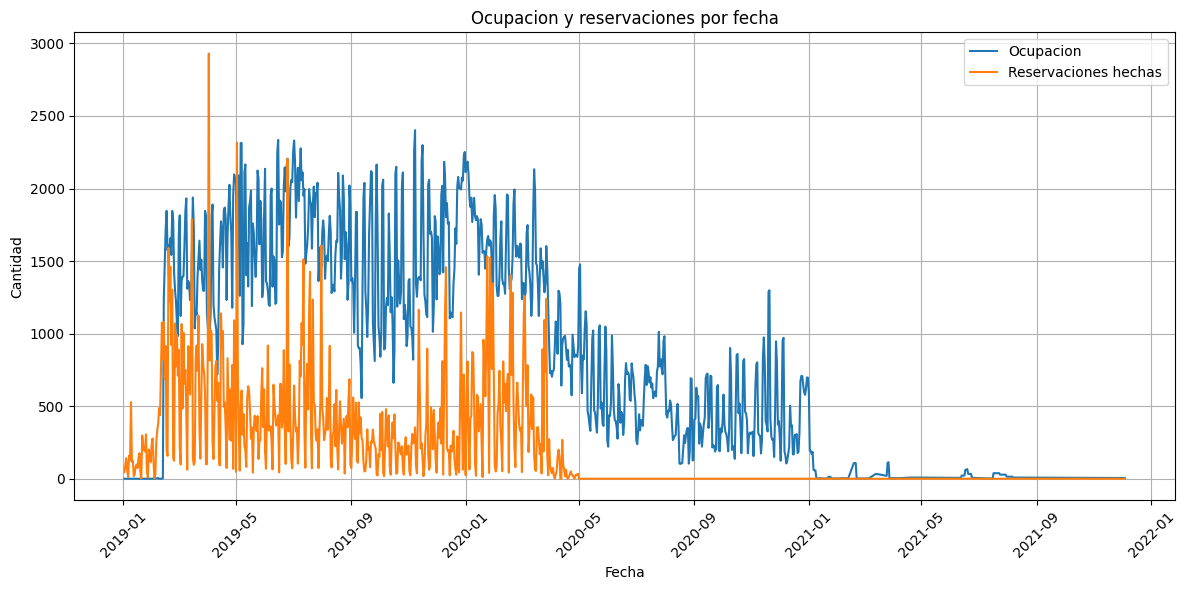

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(ValoresxFecha['Fecha'], ValoresxFecha['Ocupacion'], label='Ocupacion')
plt.plot(ValoresxFecha['Fecha'], ValoresxFecha['Reservaciones'], label='Reservaciones hechas')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.title('Ocupacion y reservaciones por fecha')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
